# Metodos de aprendizaje: Analisis del Componente Principal

Equipo 1: Aurora Alvarez Samano, Josue Estrada Herrera

### Importar librerias

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

Lectura del archivo

In [28]:
metodos = pd.read_csv("C:/Users/Estrada/Documents/Mineria de Datos AgoDic2021/Cuadernillos_PF/datos_metodos.csv")

Vusualización del contenido

In [29]:
metodos.head()

,Nombre,Nua,Semestre,Genero,Carrera,Materia,Elección,Tiempo de elección,TiempoVideo,TiempoPDF,TiempoAudio,TiempoEjemplo,Fecha_hora,Unnamed: 13
0,Fidel Perez,145424,12,Hombre,LICE,Algebra Matriz 3X3,video,6,0.584572,0.000000,0.696459,1.967743,11/20/2021 22:49,NaN
1,Fidel Perez,145424,12,Hombre,LICE,Ingles VerbosIrregulares,pdf,8,1.985114,0.530954,0.000000,2.158200,11/20/2021 22:49,NaN
2,Fidel Perez,145424,12,Hombre,LICE,Quimica Electrones de Valencia,video,8,1.830355,0.000000,0.000000,0.000000,11/20/2021 22:49,NaN
3,Fidel Perez,145424,12,Hombre,LICE,Ingles PresntSimple,ejemplo,8,0.000000,2.714251,0.000000,2.304171,11/20/2021 22:49,NaN
4,Fidel Perez,145424,12,Hombre,LICE,CalDif Limites,video,11,0.953845,0.020006,0.301034,0.163310,11/20/2021 22:49,NaN


La columna "Nombre", "NUA", "Materia" y "Fecha y hora" las podemos discriminar, ya que no nos proporciona datos como tal para nuestro analisis.

In [30]:
metodos_data = metodos.drop(['Nombre'], axis=1)
metodos_data = metodos_data.drop(['Nua'], axis=1)
metodos_data = metodos_data.drop(['Materia '], axis=1)
metodos_data = metodos_data.drop('Unnamed: 13',1)
metodos_data = metodos_data.drop(['Fecha_hora'], axis=1)

metodos_data.describe()

,Semestre,Tiempo de elección,TiempoVideo,TiempoPDF,TiempoAudio,TiempoEjemplo
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,8.687500,9.458333,0.929908,0.895798,0.636745,0.818571
std,1.904634,5.411327,1.568451,1.068273,1.184790,1.207333
min,7.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,9.000000,0.489150,0.602902,0.000000,0.515946
75%,10.250000,11.000000,1.125752,1.426192,0.842861,1.184757
max,12.000000,43.000000,8.875425,3.912428,8.229528,8.009899


Como queremos evaluar con respecto a los datos de "genero", "Semestre" y "carrera", requerimos pasar estos datos de un texto a un valor numerico.

In [31]:
genero= metodos_data.iloc[:, [1]] 
genero = genero.values

for x in range(96):
    if genero[x]=='Hombre':
        genero[x]=1
    elif genero[x]=='Mujer':
        genero[x]=2
    else :
        genero[x]=0

carrera= metodos_data.iloc[:, [2]] 
carrera = carrera.values

for x in range(96):
    if carrera[x]=='LICE':
        carrera[x]=1
    if carrera[x]=='LISC':
        carrera[x]=2
    if carrera[x]=='LGE':
        carrera[x]=3
    if carrera[x]=='LEI':
        carrera[x]=4
        
eleccion= metodos_data.iloc[:, [3]] 
eleccion = eleccion.values

for x in range(96):
    if eleccion[x]=='video':
        eleccion[x]=1
    if eleccion[x]=='pdf':
        eleccion[x]=2
    if eleccion[x]=='audio':
        eleccion[x]=3
    if eleccion[x]=='ejemplo':
        eleccion[x]=4       
        
metodos_data.iloc[:, [1]] = genero
metodos_data.iloc[:, [2]] = carrera
metodos_data.iloc[:, [3]] = eleccion

metodos_data.head()

,Semestre,Genero,Carrera,Elección,Tiempo de elección,TiempoVideo,TiempoPDF,TiempoAudio,TiempoEjemplo
0,12,1,1,1,6,0.584572,0.000000,0.696459,1.967743
1,12,1,1,2,8,1.985114,0.530954,0.000000,2.158200
2,12,1,1,1,8,1.830355,0.000000,0.000000,0.000000
3,12,1,1,4,8,0.000000,2.714251,0.000000,2.304171
4,12,1,1,1,11,0.953845,0.020006,0.301034,0.163310


In [32]:
metodos_data.keys()

Index(['Semestre', 'Genero', 'Carrera', 'Elección ', 'Tiempo de elección',
       'TiempoVideo', 'TiempoPDF', 'TiempoAudio', 'TiempoEjemplo'],
      dtype='object')

In [39]:
x = metodos_data.iloc[:,1:8].values
y = metodos_data.iloc[:,3].values

Dividir el conjunto de datos en el conjunto de entrenamiento y el conjunto de prueba

In [43]:
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Escalado de funciones
Realización de la parte de preprocesamiento en el conjunto de entrenamiento y prueba, como ajustar la escala estándar.

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

###### Aplicación de la función PCA
Aplicar la función PCA en el conjunto de entrenamiento y prueba para su análisis.

In [45]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
 
explained_variance = pca.explained_variance_ratio_

Adaptación de la regresión logística al conjunto de formación

In [47]:
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [48]:
y_pred = classifier.predict(x_test)

Haciendo la matriz de confusión

In [49]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)

Predecir el resultado del conjunto de entrenamiento

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

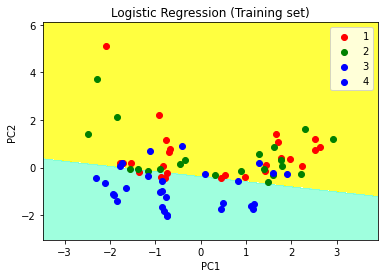

In [51]:
from matplotlib.colors import ListedColormap
 
x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1,
                     stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1,
                     stop = x_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # para Xlabel
plt.ylabel('PC2') # para Ylabel
plt.legend() # para mostrar leyenda
 
# mostrar diagrama de dispersión
plt.show()

Visualización de los resultados del conjunto de prueba

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

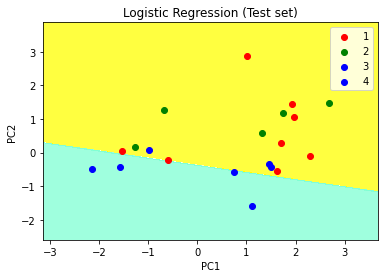

In [53]:
from matplotlib.colors import ListedColormap
 
x_set, y_set = x_test, y_test
 
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1,
                     stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1,
                     stop = x_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2') 
plt.legend()
 

plt.show()